In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
# In addition, we’ll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Note
#You can only unzip a zipped tuple once before it is removed from the computer’s memory.
#Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [5]:
pip install citipy

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [8]:
#Note
#The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        
        # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
    # Create endpoint URL with each city.
city_url = url + "&q=" + "i"

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | meulaboh
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | mandalgovi
Processing Record 6 of Set 1 | ulaangom
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | zhanatas
City not found. Skipping...
Processing Record 11 of Set 1 | santa rosa
Processing Record 12 of Set 1 | warrington
Processing Record 13 of Set 1 | colon
Processing Record 14 of Set 1 | nova olinda do norte
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | sao filipe
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | laguna
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | beringovskiy
Processing 

Processing Record 38 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 39 of Set 4 | tuktoyaktuk
Processing Record 40 of Set 4 | teguise
Processing Record 41 of Set 4 | alekseyevskoye
Processing Record 42 of Set 4 | saskylakh
Processing Record 43 of Set 4 | tres lagoas
Processing Record 44 of Set 4 | thompson
Processing Record 45 of Set 4 | norman wells
Processing Record 46 of Set 4 | vao
Processing Record 47 of Set 4 | fort frances
Processing Record 48 of Set 4 | labuhan
Processing Record 49 of Set 4 | nikolskoye
Processing Record 50 of Set 4 | santa isabel do rio negro
Processing Record 1 of Set 5 | boden
Processing Record 2 of Set 5 | havelock
Processing Record 3 of Set 5 | gimli
Processing Record 4 of Set 5 | asau
Processing Record 5 of Set 5 | bavaniste
Processing Record 6 of Set 5 | tungkang
City not found. Skipping...
Processing Record 7 of Set 5 | karonga
Processing Record 8 of Set 5 | georgetown
Processing Record 9 of Set 5 | tiznit
Processing Record 10 of Se

Processing Record 26 of Set 8 | waling
Processing Record 27 of Set 8 | nha trang
Processing Record 28 of Set 8 | verkhoyansk
Processing Record 29 of Set 8 | ciudad bolivar
Processing Record 30 of Set 8 | bauchi
Processing Record 31 of Set 8 | marystown
Processing Record 32 of Set 8 | tukrah
Processing Record 33 of Set 8 | ixtapa
Processing Record 34 of Set 8 | ponta delgada
Processing Record 35 of Set 8 | lorengau
Processing Record 36 of Set 8 | olavarria
Processing Record 37 of Set 8 | lasa
Processing Record 38 of Set 8 | tavatuy
Processing Record 39 of Set 8 | novorzhev
Processing Record 40 of Set 8 | batticaloa
Processing Record 41 of Set 8 | san carlos de bariloche
Processing Record 42 of Set 8 | myanaung
Processing Record 43 of Set 8 | belomorsk
Processing Record 44 of Set 8 | toora-khem
Processing Record 45 of Set 8 | ullapool
Processing Record 46 of Set 8 | xai-xai
Processing Record 47 of Set 8 | olafsvik
Processing Record 48 of Set 8 | san agustin
Processing Record 49 of Set 8 

Processing Record 17 of Set 12 | semporna
Processing Record 18 of Set 12 | west bay
Processing Record 19 of Set 12 | chifeng
Processing Record 20 of Set 12 | idanre
Processing Record 21 of Set 12 | selaphum
Processing Record 22 of Set 12 | termini imerese
Processing Record 23 of Set 12 | safranbolu
Processing Record 24 of Set 12 | soc trang
Processing Record 25 of Set 12 | contamana
Processing Record 26 of Set 12 | dera ismail khan
Processing Record 27 of Set 12 | grand gaube
Processing Record 28 of Set 12 | axim
Processing Record 29 of Set 12 | brookhaven
Processing Record 30 of Set 12 | la ronge
Processing Record 31 of Set 12 | doha
Processing Record 32 of Set 12 | rorvik
Processing Record 33 of Set 12 | kieta
Processing Record 34 of Set 12 | saint-philippe
Processing Record 35 of Set 12 | dranceni sat
City not found. Skipping...
Processing Record 36 of Set 12 | la primavera
Processing Record 37 of Set 12 | brae
Processing Record 38 of Set 12 | hai phong
City not found. Skipping...
P

In [12]:
len(city_data)

571

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Meulaboh,4.14,96.13,77.20,88,100,4.90,ID,2020-07-24 16:38:33
1,Albany,42.60,-73.97,82.00,56,100,5.23,US,2020-07-24 16:38:33
2,Ancud,-41.87,-73.82,48.00,81,90,10.29,CL,2020-07-24 16:38:34
3,Mandalgovi,45.76,106.27,70.59,58,100,23.87,MN,2020-07-24 16:38:34
4,Ulaangom,49.98,92.07,65.28,53,0,0.22,MN,2020-07-24 16:38:34
5,Butaritari,3.07,172.79,82.53,78,1,15.28,KI,2020-07-24 16:38:34
6,Bluff,-46.60,168.33,39.00,83,92,3.00,NZ,2020-07-24 16:36:23
7,Barrow,71.29,-156.79,33.80,86,90,18.34,US,2020-07-24 16:36:36
8,Santa Rosa,14.31,121.11,84.20,70,100,3.02,PH,2020-07-24 16:38:34
9,Warrington,53.39,-2.58,75.00,64,40,3.36,GB,2020-07-24 16:38:34


In [14]:
new_column_order = ['City', 'Country','Date','Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Meulaboh,ID,2020-07-24 16:38:33,4.14,96.13,77.20,88,100,4.90
1,Albany,US,2020-07-24 16:38:33,42.60,-73.97,82.00,56,100,5.23
2,Ancud,CL,2020-07-24 16:38:34,-41.87,-73.82,48.00,81,90,10.29
3,Mandalgovi,MN,2020-07-24 16:38:34,45.76,106.27,70.59,58,100,23.87
4,Ulaangom,MN,2020-07-24 16:38:34,49.98,92.07,65.28,53,0,0.22
...,...,...,...,...,...,...,...,...,...
566,Umm Lajj,SA,2020-07-24 16:39:28,25.02,37.27,89.60,51,0,8.30
567,Zhangye,CN,2020-07-24 16:39:28,38.93,100.45,66.45,40,21,7.31
568,Sept-Iles,CA,2020-07-24 16:35:19,50.20,-66.38,72.00,73,90,8.05
569,Tarakan,ID,2020-07-24 16:39:29,3.30,117.63,82.42,70,100,4.47


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1595608770.5763175

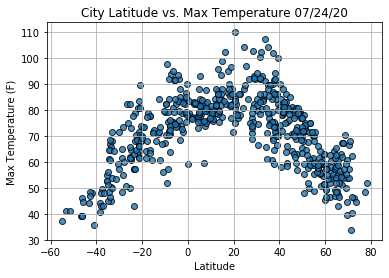

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

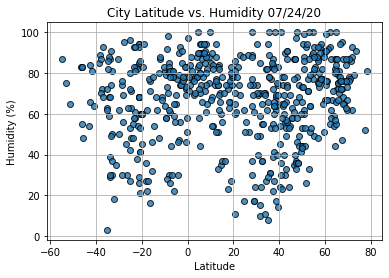

In [20]:
# Build the scatter plots for latitude vs. humidity.             --------------------6.3.2
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

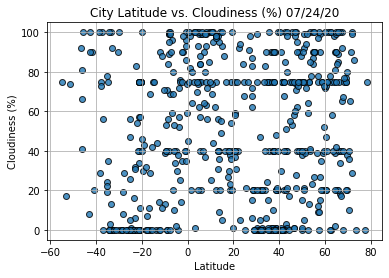

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

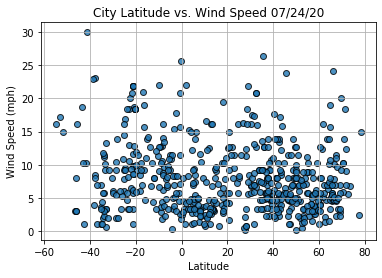

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Create a function to create perform linear regression on the weather data                -------------6.4.2
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                 San Patricio
Country                        MX
Date          2020-07-24 16:38:34
Lat                         19.22
Lng                        -104.7
Max Temp                     87.8
Humidity                       74
Cloudiness                     40
Wind Speed                   4.43
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
566     True
567     True
568     True
569     True
570    False
Name: Lat, Length: 571, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Meulaboh,ID,2020-07-24 16:38:33,4.14,96.13,77.20,88,100,4.90
1,Albany,US,2020-07-24 16:38:33,42.60,-73.97,82.00,56,100,5.23
3,Mandalgovi,MN,2020-07-24 16:38:34,45.76,106.27,70.59,58,100,23.87
4,Ulaangom,MN,2020-07-24 16:38:34,49.98,92.07,65.28,53,0,0.22
5,Butaritari,KI,2020-07-24 16:38:34,3.07,172.79,82.53,78,1,15.28


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
#plot_linear_regression(x_values, y_values,'title', 'Max Temp',(10,40))

In [29]:
y_values

0      77.20
1      82.00
3      70.59
4      65.28
5      82.53
       ...  
565    81.93
566    89.60
567    66.45
568    72.00
569    82.42
Name: Max Temp, Length: 392, dtype: float64

In [30]:
x_values

0       4.14
1      42.60
3      45.76
4      49.98
5       3.07
       ...  
565    12.18
566    25.02
567    38.93
568    50.20
569     3.30
Name: Lat, Length: 392, dtype: float64

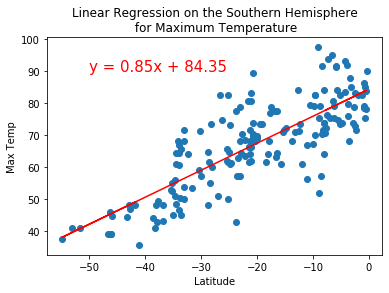

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

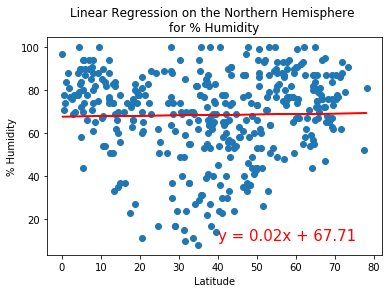

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

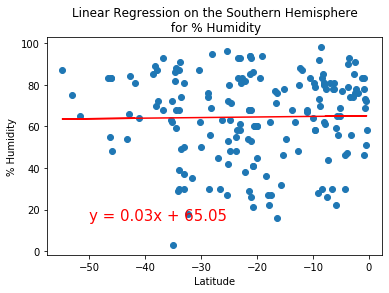

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

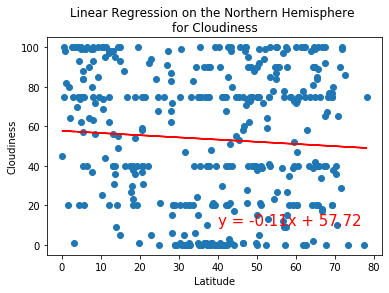

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Cloudiness', 'Cloudiness',(40,10))

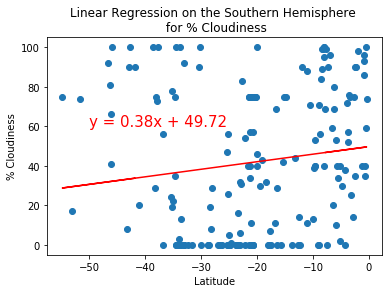

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

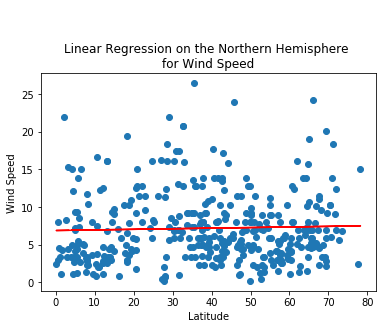

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

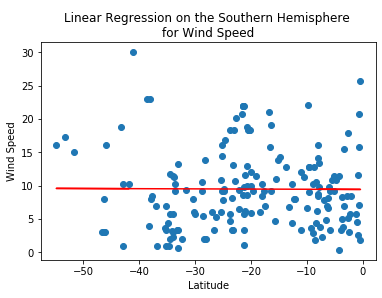

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))

In [38]:
import gmaps